## Links
- https://cs231n.github.io/neural-networks-case-study/

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Define neural n/w

In [5]:
class NeuralNetwork:

    def _sigmoid(self, x):
        num = np.exp(x - np.max(x,  axis=1, keepdims=True))
        prob = num/ np.sum(num, axis=1, keepdims=True)
        return prob

    def __init__(self, hidden_dim=100, learning_rate=0.1, reg_rate=1e-3, num_iterations=10000):
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate
        self.reg_rate = reg_rate
        self.num_iterations = num_iterations
        self.k_class = None
        self.W1, self.W2 = None, None
        self.b_1, self.b_2 = None, None
        
    def fit(self, X_data, y, k_class=3):

        n_examples, n_features = X_data.shape
        self.k_class = k_class

        self.W1 = 0.01 * np.random.randn(n_features, self.hidden_dim)
        self.b_1 = np.zeros((1, self.hidden_dim))
        
        self.W2 =0.01 *   np.random.randn(self.hidden_dim, self.k_class )
        self.b_2 = np.zeros((1, self.k_class))

        # iterate for loss and back prop
        for iteration in range(self.num_iterations):

            hidden_layer = np.maximum(0, np.dot(X_data, self.W1) + self.b_1) # Relu
            scores = np.dot(hidden_layer, self.W2) + self.b_2
            
            probs =  self._sigmoid(scores)
            
            correct_logprobs = -np.log(probs[range(n_examples), y])

            loss = 1/n_examples * np.sum((correct_logprobs))
            
            reg_loss =0.5 * (self.reg_rate * np.sum(self.W1 * self.W1) + self.reg_rate * np.sum(self.W2 * self.W2))
            
            loss = loss + reg_loss

            print (iteration, loss) if iteration % 1000 == 0 else None
            
            # run backprop 
            dscores = probs
            # yi - pi
            dscores[range(n_examples), y] = dscores[range(n_examples), y] - 1
            dscores = dscores/n_examples

            
            dW2 = np.dot(hidden_layer.T, dscores)
            db2 = np.sum(dscores, axis=0, keepdims=True)
            
            dhidden = np.dot(dscores, self.W2.T)
            
            dhidden [hidden_layer <= 0 ] = 0
            
            dW1 = np.dot(X_data.T, dhidden)
            db1 = np.sum(dhidden, axis=0, keepdims=True)
            

            dW1 += self.reg_rate * self.W1
            dW2 += self.reg_rate * self.W2

            self.W2= self.W2 - self.learning_rate * dW2
            self.W1= self.W1 - self.learning_rate * dW1
            
            self.b_1 = self.b_1 - self.learning_rate * db1
            self.b_2 = self.b_2 - self.learning_rate * db2
            
    def predict(self, X_data):
        hidden = np.maximum(0, np.dot(X_data, self.W1) + self.b_1)
        scores = np.dot(hidden, self.W2) + self.b_2
#         import pdb; pdb.set_trace()
        return np.argmax(scores, axis=1)
            
#             dLoss = ? 
#     print ("done")
 
nn = NeuralNetwork(num_iterations=1)
nn.fit(X, y)

0 1.098645722170166


## 2. Generate data

In [3]:
N, D, K = 100, 2, 3

(300, 2)
(300,)


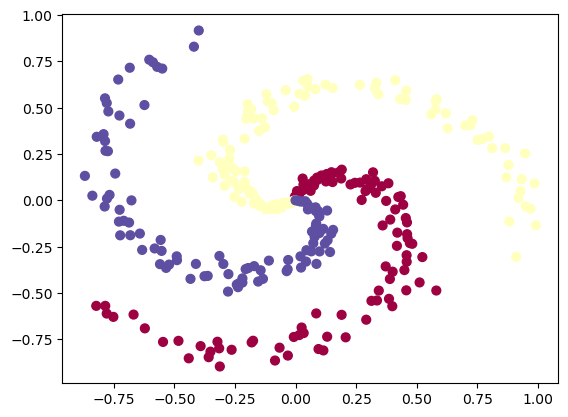

In [4]:
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

print (X.shape)
print (y.shape)
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
nn = NeuralNetwork(num_iterations=40000)
nn.fit(X, y)

0 1.098682654941915
1000 0.6893563157566026
2000 0.6269564525259945
3000 0.5017197262573525
4000 0.39261973815799855
5000 0.3448974856131598
6000 0.32147973092875737
7000 0.3082707470181044
8000 0.2994286688908143
9000 0.2934665913072235
10000 0.28887070045045193
11000 0.28495860505091086
12000 0.28143403744331674
13000 0.27804074394279005
14000 0.27463815981450623
15000 0.27148679145771093
16000 0.26868768690215195
17000 0.26613757311166353
18000 0.2633372054724725
19000 0.2606704897708507
20000 0.25830468041099164
21000 0.25613382076951074
22000 0.2539861837460546
23000 0.25191879455710775
24000 0.25003216466248185
25000 0.24834616717284227
26000 0.24686191397467747
27000 0.24558235888559088
28000 0.24453519240988658
29000 0.24362117476384185
30000 0.24282305342633223
31000 0.24212966028231503
32000 0.24155852237771225
33000 0.24105729260874814
34000 0.24067030713388335
35000 0.24037371714462383
36000 0.24014384539663736
37000 0.2399657465256428
38000 0.2398125111793578
39000 0.23967

In [7]:
prediction = nn.predict(X)
np.mean(prediction == y)

np.float64(0.9866666666666667)

## Plot classifier 

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], nn.W1) + nn.b_1), nn.W2) + nn.b_2

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

plt.xlim(xx.min(), xx.max())

plt.ylim(yy.min(), yy.max())

#fig.savefig('spiral_net.png')